<a href="https://colab.research.google.com/github/voduyanhvu/PCA_Hands_on_Demo/blob/main/notebooks/pca_iris_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class PCA:
  def __init__(self, n_dimension: int):
    self.n_dimension = n_dimension

  def fit_transform(self, X):
    mean = np.mean(X, axis=0)
    X = X - mean
    cov = X.T.dot(X) / X.shape[0] 
    eigen_values, eigen_vectors, = np.linalg.eig(cov)
    select_index = np.argsort(eigen_values)[::-1][:self.n_dimension]
    U = eigen_vectors[:, select_index]
    X_new = X.dot(U)
    return X_new
    
df = pd.read_csv('/content/sample_data/iris.csv')
#df.head()
#df.describe()
X = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
Y = df['variety'].to_numpy()

In [23]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
X = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
Y = df['variety'].to_numpy()

In [18]:
pca = PCA(n_dimension=2)
new_X = pca.fit_transform(X)

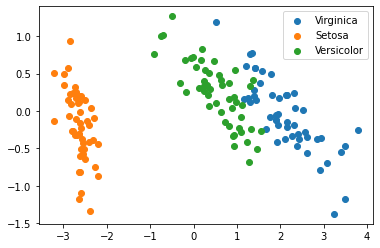

In [21]:
for label in set(Y):
    X_class = new_X[Y == label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
    plt.legend()